### *Импорт библиотек для работы с дата-сетом* 

In [5148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5149]:
df = pd.read_csv('water_potability.csv')

In [5150]:
num_new_records = 1000  # Например, создадим 1000 новых записей

# Генерация новых записей для класса 0 (непригодная вода)
new_data_0 = {
    'ph': np.random.uniform(low=5.0, high=7.0, size=num_new_records),  # pH ниже нормального
    'Hardness': np.random.uniform(low=50, high=150, size=num_new_records),
    'Solids': np.random.uniform(low=10000, high=30000, size=num_new_records),
    'Chloramines': np.random.uniform(low=4.0, high=10.0, size=num_new_records),
    'Sulfate': np.random.uniform(low=200, high=300, size=num_new_records),
    'Conductivity': np.random.uniform(low=500, high=800, size=num_new_records),
    'Organic_carbon': np.random.uniform(low=5.0, high=15.0, size=num_new_records),
    'Trihalomethanes': np.random.uniform(low=80, high=120, size=num_new_records),
    'Turbidity': np.random.uniform(low=5.0, high=10.0, size=num_new_records),
    'Potability': 0
}

# Генерация новых записей для класса 1 (пригодная вода)
new_data_1 = {
    'ph': np.random.uniform(low=6.5, high=8.5, size=num_new_records),  # pH в нормальном диапазоне
    'Hardness': np.random.uniform(low=150, high=300, size=num_new_records),
    'Solids': np.random.uniform(low=5000, high=15000, size=num_new_records),
    'Chloramines': np.random.uniform(low=0.0, high=4.0, size=num_new_records),
    'Sulfate': np.random.uniform(low=100, high=200, size=num_new_records),
    'Conductivity': np.random.uniform(low=200, high=500, size=num_new_records),
    'Organic_carbon': np.random.uniform(low=2.0, high=5.0, size=num_new_records),
    'Trihalomethanes': np.random.uniform(low=20, high=60, size=num_new_records),
    'Turbidity': np.random.uniform(low=1.0, high=3.0, size=num_new_records),
    'Potability': 1
}

# Создание DataFrame из новых данных
df_class_0 = pd.DataFrame(new_data_0)
df_class_1 = pd.DataFrame(new_data_1)

# Объединение новых данных с существующим DataFrame
df = pd.concat([df, df_class_0, df_class_1], ignore_index=True)

In [5151]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5152]:
#некоторые общие рекомендации по диапазонам для каждого из столбцов:
#pH: Обычно варьируется от 6.5 до 8.5 для питьевой воды.
#Solids: Зависит от источника, но значения выше 1000 мг/л могут указывать на загрязнение.
#Chloramines: Обычно не должно превышать 4 мг/л.
#Sulfate: Рекомендуется не более 250 мг/л для питьевой воды.
#Conductivity: Обычно до 1000 мкСм/см для питьевой воды.
#Organic_carbon: Обычно не более 2-5 мг/л, хотя это может варьироваться.
#Trihalomethanes: Рекомендуется не более 80 мкг/л.
#Turbidity: Обычно не более 1 НТУ для питьевой воды.
#Potability: Бинарный признак (0 или 1).

In [5153]:
df.info()
#Столбец ph имеет 491 пропущенное значение.
#Столбец Sulfate имеет 781 пропущенное значение.
#Столбец Trihalomethanes имеет 162 пропущенных значения.
#Остальные столбцы не имеют пропусков.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5276 entries, 0 to 5275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               4785 non-null   float64
 1   Hardness         5276 non-null   float64
 2   Solids           5276 non-null   float64
 3   Chloramines      5276 non-null   float64
 4   Sulfate          4495 non-null   float64
 5   Conductivity     5276 non-null   float64
 6   Organic_carbon   5276 non-null   float64
 7   Trihalomethanes  5114 non-null   float64
 8   Turbidity        5276 non-null   float64
 9   Potability       5276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 412.3 KB


In [5154]:
df.shape
#Количество строк: 3276
#Количество столбцов: 10
#Типы данных:
#float64: используются для большинства признаков (9 столбцов).
#int64: используется для целевой переменной Potability (1 столбец)

(5276, 10)

In [5155]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ph,4785.0,6.933687,1.379318,0.000000,6.019940,6.877457,7.812804,14.000000
Hardness,5276.0,183.477462,54.722817,47.432000,153.442569,190.839775,218.514590,323.124000
Solids,5276.0,19432.437487,8776.372025,320.942611,12698.245022,18424.491620,25308.805664,61227.196008
Chloramines,5276.0,6.139408,2.533517,0.004046,4.736116,6.627382,7.924135,13.127000
Sulfate,4495.0,273.930789,83.106120,100.028143,210.380744,290.294662,337.378435,481.030642
Conductivity,5276.0,453.676789,128.791804,181.483754,361.404862,435.634735,524.957680,799.611652
Organic_carbon,5276.0,11.446234,5.073521,2.002389,7.542636,12.344061,15.070799,28.300000
Trihalomethanes,5114.0,67.907375,23.774051,0.738000,50.980546,66.622485,84.581189,124.000000
Turbidity,5276.0,4.272165,1.952565,1.002708,2.959552,3.955028,4.990595,9.995446
Potability,5276.0,0.431766,0.495369,0.000000,0.000000,0.000000,1.000000,1.000000


In [5156]:
#pH (уровень pH):
#Среднее значение составляет 7,08, что указывает на нейтральную среду.
#Минимальное значение 0,00 и максимальное значение 14,00 указывают на возможные ошибки в данных или экстремальные условия.
#Hardness (жесткость):
#Средняя жесткость составляет 196,37 мг/л, с диапазоном от 47,43 до 323,12 мг/л.
#Стандартное отклонение (32,88) говорит о том, что значения варьируются в пределах нормы.
#Solids (общие растворенные вещества):
#Среднее значение составляет 22014,09 мг/л, с максимальным значением 61227,20 мг/л.
#Высокое стандартное отклонение (8768,57) указывает на значительные колебания в содержании растворенных веществ.
#Chloramines (хлорамины):
#Среднее значение составляет 7,12 мг/л, с диапазоном от 0,35 до13,13 мг/л.
#Уровни хлораминов находятся в пределах безопасных значений для питьевой воды.
#Sulfate (сульфаты):
#Среднее значение составляет 333,78 мг/л, с минимальным и максимальным значениями от 129 до481 мг/л.
#Стандартное отклонение (41,42) показывает умеренные колебания.
#Conductivity (электропроводность):
#Средняя электропроводность составляет 426,21 мкСм/см, с диапазоном от 181,48 до753,34 мкСм/см.
#Высокая проводимость может указывать на наличие большого количества растворенных солей.
#Organic_carbon (органический углерод):
#Среднее значение составляет 14,28 мг/л, что является нормальным уровнем.
#Диапазон от 2,20 до28,30 мг/л показывает разнообразие в содержании органических веществ.
#Trihalomethanes (трихалометаны):
#Среднее значение составляет 66,40 мкг/л, с диапазоном от 0,74 до124 мкг/л.
#Важно следить за уровнями тригалометанов из-за их потенциальной канцерогенности.
#Turbidity (мутность):
#Средняя мутность составляет 3,97 НТУ, с диапазоном от 1,45 до6,74 НТУ.
#Более высокие значения мутности могут указывать на загрязнение воды.
#Potability (пригодность для питья):
#Среднее значение составляет около 0,39, что указывает на то, что примерно треть данных соответствует питьевой воде.
#Значения варьируются между 0 и 1, где 1 означает пригодность для питья.

# Описание набора данных "Качество воды и пригодность для питья"

- **ph (pH)**: 
  - Уровень pH воды, который показывает её кислотность или щелочность. Значения варьируются от 0 до 14, где 7 считается нейтральным. Более низкие значения указывают на кислую среду, а более высокие — на щелочную.

- **Hardness (Жесткость)**: 
  - Показатель жесткости воды, который определяется содержанием кальция и магния. Измеряется в мг/л. Более высокие значения могут указывать на более жесткую воду.

- **Solids (Общие растворенные вещества)**: 
  - Общее количество растворенных веществ в воде, измеряемое в мг/л. Высокие значения могут указывать на загрязнение воды.

- **Chloramines (Хлорамины)**: 
  - Уровень хлораминов в воде, который используется как дезинфицирующее средство. Измеряется в мг/л. Высокие уровни могут быть вредными для здоровья.

- **Sulfate (Сульфаты)**: 
  - Концентрация сульфатов в воде, измеряемая в мг/л. Сульфаты могут влиять на вкус воды и её качество.

- **Conductivity (Электропроводность)**: 
  - Показатель электропроводности воды, измеряемый в мкСм/см. Высокая проводимость может свидетельствовать о наличии большого количества растворенных веществ.

- **Organic_carbon (Органический углерод)**: 
  - Концентрация органического углерода в воде, измеряемая в мг/л. Высокие уровни могут указывать на загрязнение органическими веществами.

- **Trihalomethanes (Трихалометаны)**: 
  - Уровень тригалометанов в воде, которые образуются при хлорировании и могут быть канцерогенными. Измеряется в мкг/л.

- **Turbidity (Мутность)**: 
  - Показатель мутности воды, который отражает наличие взвешенных частиц. Измеряется в НТУ (непосредственных единицах мутности). Высокие значения указывают на плохое качество воды.

- **Potability (Пригодность для питья)**: 
  - Целевая переменная, которая указывает на то, пригодна ли вода для питья (1) или нет (0). Это бинарный признак, который является основным объектом анализа.

# Проверки

In [5159]:
df.duplicated().sum() 

0

In [5160]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5161]:
#Общее количество пропущенных значений:
#ph: 491
#Sulfate: 781
#Trihalomethanes: 162
#Остальные столбцы не имеют пропусков.

In [5162]:
df.duplicated().sum()
#в наборе данных нет полностью идентичных строк, что является хорошим знаком.

0

In [5163]:
df['ph'].value_counts()

ph
3.716080    1
5.462994    1
5.797693    1
5.555096    1
5.128411    1
           ..
7.456251    1
9.281303    1
6.832217    1
8.829806    1
7.511085    1
Name: count, Length: 4785, dtype: int64

In [5164]:
df['Hardness'].value_counts()

Hardness
204.890455    1
108.068855    1
59.716221     1
100.276589    1
113.145736    1
             ..
258.891601    1
180.958667    1
191.150479    1
234.328569    1
218.034390    1
Name: count, Length: 5276, dtype: int64

In [5165]:
df['Solids'].value_counts()

Solids
20791.318981    1
19174.201966    1
19767.378376    1
10775.013889    1
28152.200554    1
               ..
20911.904666    1
28165.872560    1
23172.281510    1
11746.607522    1
7887.132065     1
Name: count, Length: 5276, dtype: int64

In [5166]:
df['Chloramines'].value_counts()

Chloramines
7.300212    1
4.722289    1
8.903741    1
8.393693    1
6.473235    1
           ..
6.361756    1
7.160084    1
7.132154    1
6.961265    1
1.242452    1
Name: count, Length: 5276, dtype: int64

In [5167]:
df['Sulfate'].value_counts()

Sulfate
368.516441    1
257.571156    1
266.303717    1
204.080453    1
240.101323    1
             ..
339.327905    1
295.351070    1
354.821194    1
374.309131    1
182.603071    1
Name: count, Length: 4495, dtype: int64

In [5168]:
df['Conductivity'].value_counts()

Conductivity
564.308654    1
515.593158    1
761.553970    1
763.596381    1
786.480664    1
             ..
421.133035    1
370.289838    1
365.140579    1
407.102302    1
259.547491    1
Name: count, Length: 5276, dtype: int64

In [5169]:
df['Organic_carbon'].value_counts()

Organic_carbon
10.379783    1
8.182838     1
9.142179     1
11.949771    1
11.795578    1
            ..
9.631650     1
16.942566    1
12.679501    1
13.771680    1
2.506185     1
Name: count, Length: 5276, dtype: int64

In [5170]:
df['Trihalomethanes'].value_counts()

Trihalomethanes
86.990970     1
95.097662     1
98.154256     1
104.201568    1
108.635159    1
             ..
81.453941     1
72.033644     1
71.834058     1
76.831226     1
58.860707     1
Name: count, Length: 5114, dtype: int64

In [5171]:
df['Turbidity'].value_counts()

Turbidity
2.963135    1
8.054487    1
6.852454    1
5.826186    1
5.709080    1
           ..
4.546070    1
3.089597    1
4.018447    1
3.689145    1
2.221722    1
Name: count, Length: 5276, dtype: int64

In [5172]:
df['Potability'].value_counts()
#Значение 0 (непригодно для питья) встречается 1998 раз, а значение 1 (пригодно для питья) — 1278 раз.
#Наблюдается некоторый дисбаланс классов, но это не критично.

Potability
0    2998
1    2278
Name: count, dtype: int64

# *Проверим датафрейм на наличие пропущенных значений с помощью команды*

In [5174]:
unique_counts = {col: df[col].nunique() for col in df.columns}
print(unique_counts)
#Каждый столбец имеет уникальные значения:
#ph: 2785 уникальных значений
#Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Turbidity: все имеют 3276 уникальных значений.
#Sulfate: 2495 уникальных значений, что указывает на наличие пропусков.
#Trihalomethanes: 3114 уникальных значений.
#Целевая переменная Potability имеет 2 уникальных значения (0 и 1), что соответствует бинарной классификации.

{'ph': 4785, 'Hardness': 5276, 'Solids': 5276, 'Chloramines': 5276, 'Sulfate': 4495, 'Conductivity': 5276, 'Organic_carbon': 5276, 'Trihalomethanes': 5114, 'Turbidity': 5276, 'Potability': 2}


# Обработка пропусков в данных

In [5176]:
# Заполнение пропусков средним значением
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

# Проверка на наличие пропусков после обработки
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


C:\Users\aniwe\AppData\Local\Temp\ipykernel_16420\2700232233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].mean(), inplace=True)
C:\Users\aniwe\AppData\Local\Temp\ipykernel_16420\2700232233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

# Находятся ли значения в указанных диапазонах

In [5178]:
# Обработка Conductivity
df.loc[df['Conductivity'] < 0, 'Conductivity'] = df['Conductivity'].median()  # Заменяем отрицательные значения
df.loc[df['Conductivity'] > 1000, 'Conductivity'] = df['Conductivity'].median()  # Заменяем высокие значения
# Проверка на наличие пропусков после обработки (если необходимо)
print(df.isna().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [5179]:
# Определение пределов
limits = {
    'ph': (6.5, 8.5),
    'Hardness': (0, 500),
    'Solids': (0, 1000), 
    'Chloramines': (0, 4),
    'Sulfate': (0, 250),
    'Conductivity': (0, 1000),
    'Organic_carbon': (0, 5),
    'Trihalomethanes': (0, 80),
    'Turbidity': (0, 1),
}

# Проверка значений
for column, (lower_limit, upper_limit) in limits.items():
    out_of_bounds = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    if not out_of_bounds.empty:
        print(f"Значения вне пределов нормы для {column}:")
        print(out_of_bounds)

Значения вне пределов нормы для ph:
             ph    Hardness        Solids  Chloramines     Sulfate  \
1      3.716080  129.422921  18630.057858     6.635246  273.930789   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
4267   5.777590   66.819550  19630.020850     9.383990  256.329649   
4272   5.555519  103.713580  18697.679060     4.311208  258.193623   
4273   5.255852   70.944436  25265.211036     8.172119  266.674165   
4274   5.755113  117.825828  20555.213420     5.824089  242.270041   
4275   5.017716  111.905839  26148.508242     8.635277  283.483628   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1       592.885359       15.180013        56.3

In [5180]:
# Проверка значений
for column, (lower_limit, upper_limit) in limits.items():
    out_of_bounds = df[(df[column] < lower_limit) | (df[column] > upper_limit)]
    if not out_of_bounds.empty:
        print(f"Значения вне пределов нормы для {column}:")
        print(out_of_bounds)

Значения вне пределов нормы для ph:
             ph    Hardness        Solids  Chloramines     Sulfate  \
1      3.716080  129.422921  18630.057858     6.635246  273.930789   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
4267   5.777590   66.819550  19630.020850     9.383990  256.329649   
4272   5.555519  103.713580  18697.679060     4.311208  258.193623   
4273   5.255852   70.944436  25265.211036     8.172119  266.674165   
4274   5.755113  117.825828  20555.213420     5.824089  242.270041   
4275   5.017716  111.905839  26148.508242     8.635277  283.483628   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
1       592.885359       15.180013        56.3

In [5181]:
#Построим гистограммы распределения каждого признака (столбца данных)

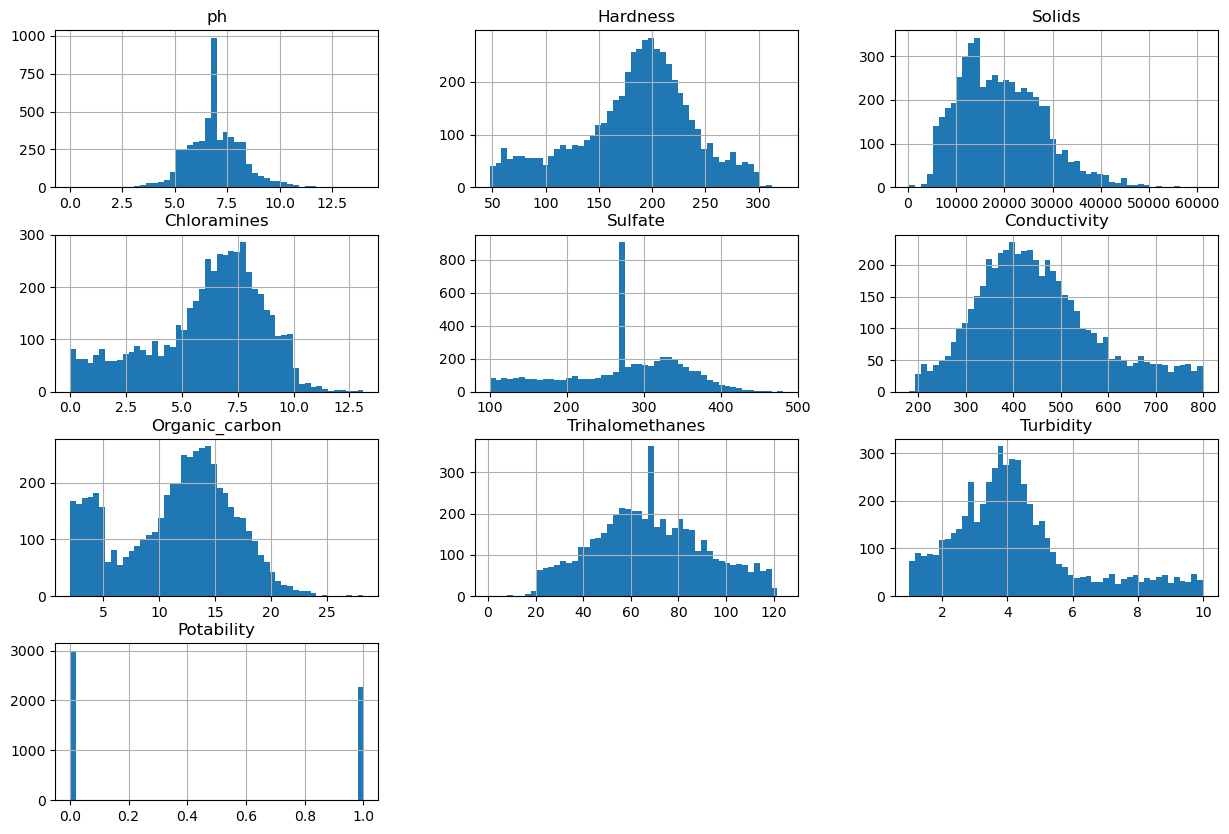

In [5182]:
df.hist(figsize = (15,10), bins = 50);

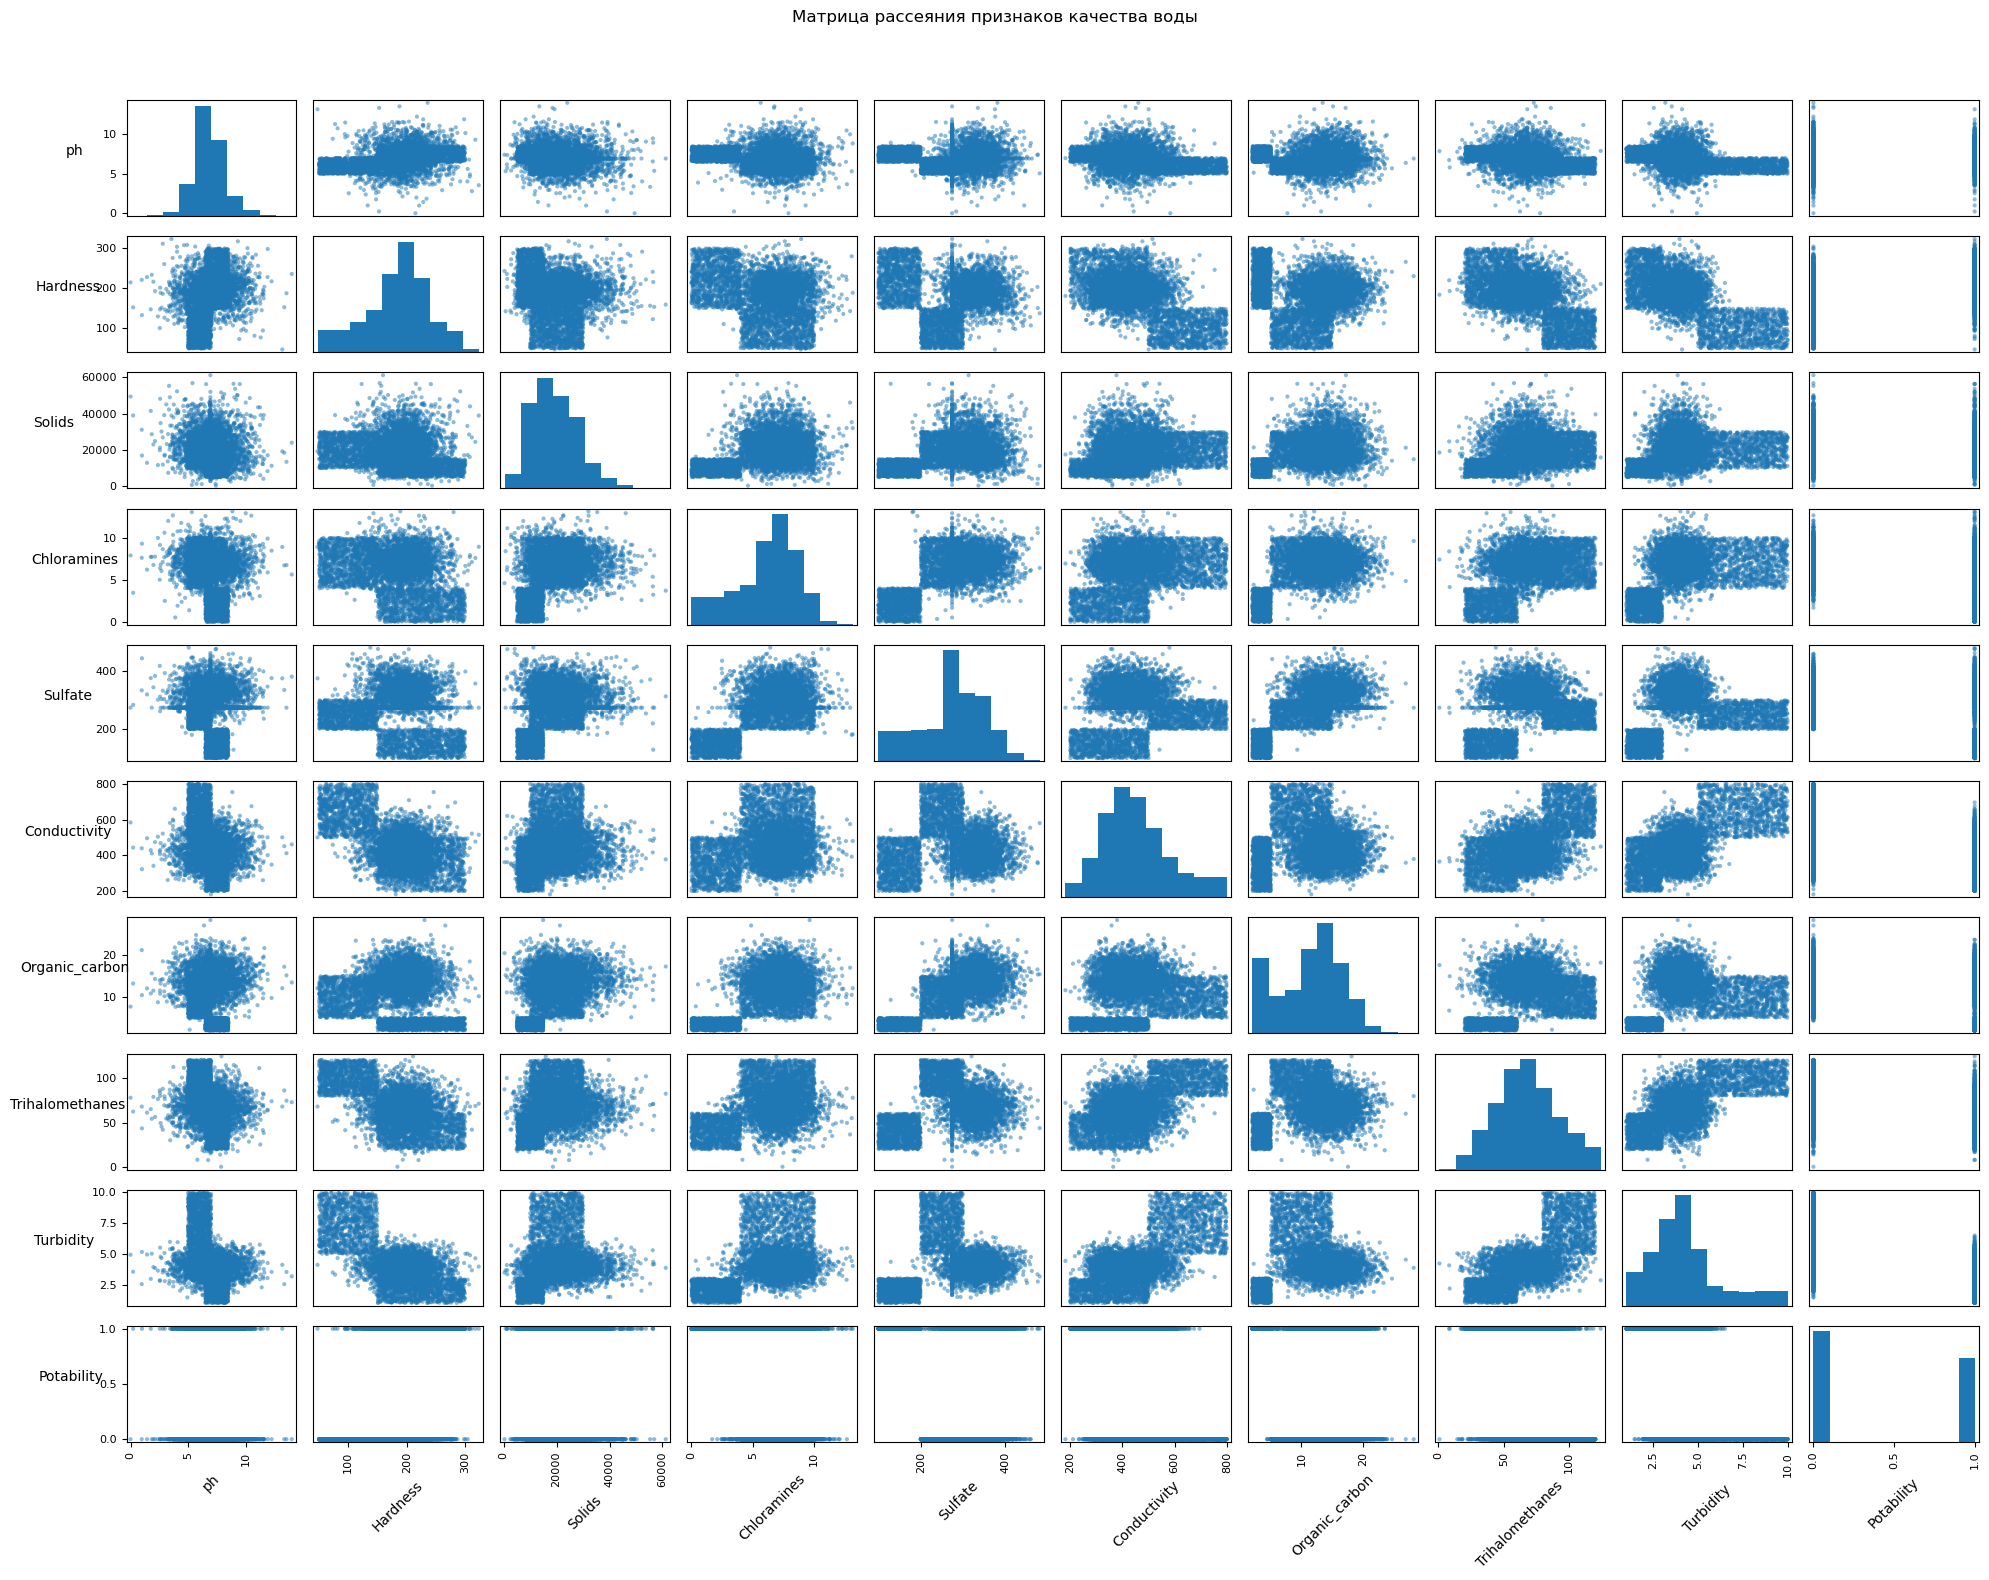

In [5183]:
from pandas.plotting import scatter_matrix
columns_to_plot = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                   "Conductivity", "Organic_carbon", "Trihalomethanes", 
                   "Turbidity", "Potability"]

# Построение матрицы рассеяния
scatter_matrix(df[columns_to_plot], figsize=(20, 15), alpha=0.5)

# Поворот меток осей
for ax in plt.gcf().axes:
    ax.xaxis.label.set_rotation(45)  # Вертикальные метки для X
    ax.yaxis.label.set_rotation(0)    # Горизонтальные метки для Y
    ax.yaxis.labelpad = 20             # Увеличение расстояния между меткой и осью

# Использование tight_layout для предотвращения наложения
plt.tight_layout()

# Показать заголовок выше графиков
plt.suptitle("Матрица рассеяния признаков качества воды", y=1.05)  # y=1.05 поднимает заголовок выше

# Показать график
plt.show()

Матрица рассеяния (scatter matrix) для нашего набора данных о качестве воды 
и пригодности для питья является мощным инструментом визуализации,
который позволяет выявить взаимосвязи между различными признаками. Взаимосвязи между признаками:

Корреляция: Матрица рассеяния помогает визуально определить, есть ли линейные или нелинейные зависимости между признаками.
Например, если точки на графике сгруппированы в виде прямой линии, это может указывать на сильную корреляцию между двумя переменными
Выявление выбросов

Аномальные значения: Графики могут помочь выявить выбросы (аномальные значения), 
которые значительно отличаются от остальных данных. Это важно для последующей обработки данных и построения модели.                                    аспределение значений

Диагональные графики: На диагонали матрицы обычно отображаются гистограммы или оценки плотности для каждого признака, что позволяет увидеть распределение значений и оценить их нормальность.
Влияние на целевую переменную

Анализ целевой переменной (Potability):  моное использовать матрицу рассеяния, чтобы увидеть, как различные признаки влияют на целевую переменную (пригодность для питья). Например,можное заметить, что высокие уровни мутности или хлораминов связаны с низкой вероятностью пригодности воды для питья. 

C:\Users\aniwe\AppData\Local\Temp\ipykernel_16420\1542138431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Potability', data=df, palette='viridis')


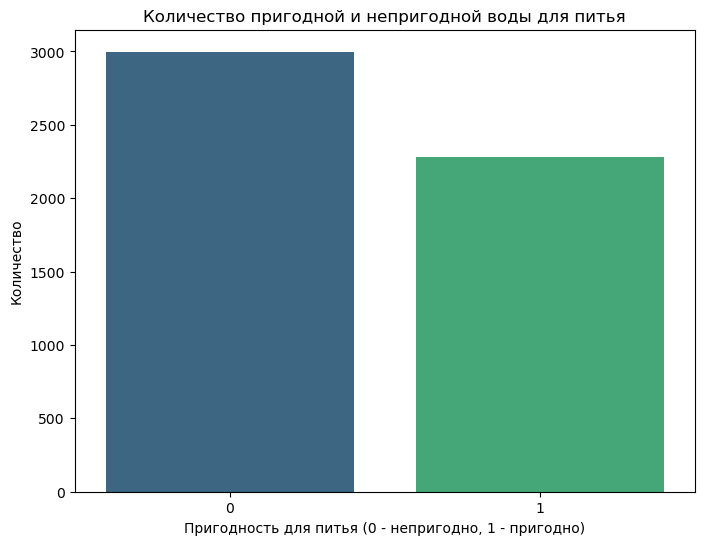

In [5185]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Potability', data=df, palette='viridis')

# Добавление заголовка и меток осей
plt.title('Количество пригодной и непригодной воды для питья')
plt.xlabel('Пригодность для питья (0 - непригодно, 1 - пригодно)')
plt.ylabel('Количество')

# Показать график
plt.show()


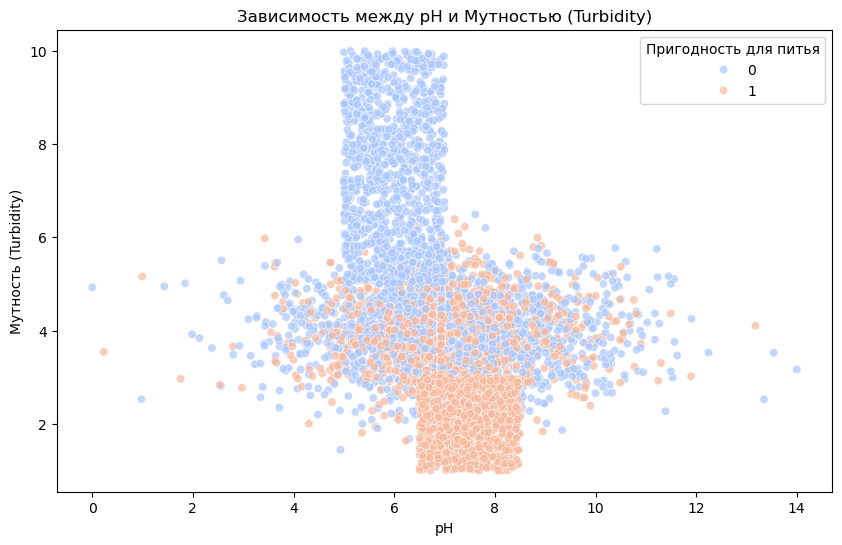

In [5186]:
#График зависимости между pH и Turbidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['ph'], y=df['Turbidity'], hue='Potability', data=df, palette='coolwarm', alpha=0.7)
plt.title('Зависимость между pH и Мутностью (Turbidity)')
plt.xlabel('pH')
plt.ylabel('Мутность (Turbidity)')
plt.legend(title='Пригодность для питья', loc='upper right')
plt.show()

Что показывает: Этот график показывает, как значения pH соотносятся с мутностью воды.
Цветовая кодировка (hue) указывает на пригодность воды для питья (0 или 1).
Интерпретация:
Можно увидеть, как мутность изменяется в зависимости от pH. 
Например, если мутность увеличивается при низких значениях pH,
это может указывать на проблемы с качеством воды.

C:\Users\aniwe\AppData\Local\Temp\ipykernel_16420\1061663831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Potability'], y=df['Chloramines'], data=df, palette='Set2')


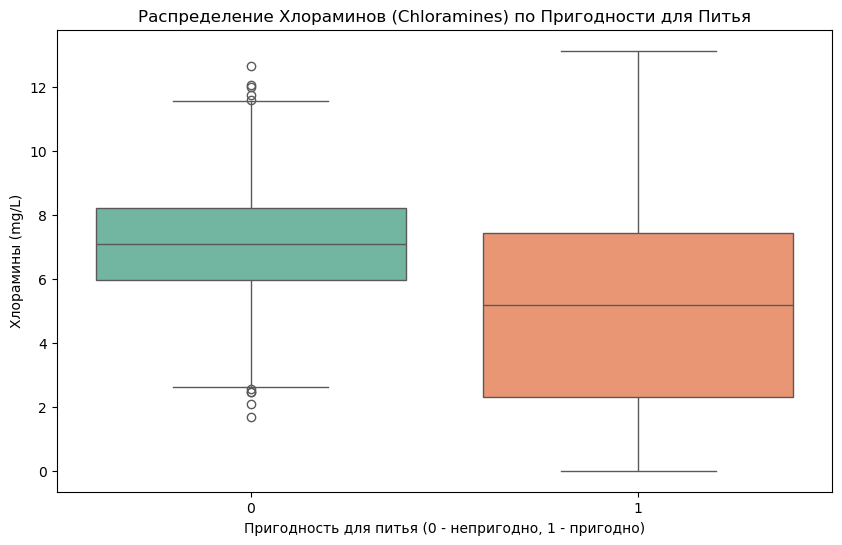

In [5188]:
#График распределения Chloramines по Potability
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Potability'], y=df['Chloramines'], data=df, palette='Set2')
plt.title('Распределение Хлораминов (Chloramines) по Пригодности для Питья')
plt.xlabel('Пригодность для питья (0 - непригодно, 1 - пригодно)')
plt.ylabel('Хлорамины (mg/L)')
plt.show()

Коробчатая диаграмма показывает распределение уровней хлораминов в зависимости от того, пригодна ли вода для питья.
Интерпретация: 
Можно увидеть медиану и разброс значений хлораминов для каждой категории. Если значения
хлораминов значительно выше в категории непригодной воды, 
это может указывать на то, что высокие уровни хлораминов связаны с низкой пригодностью.

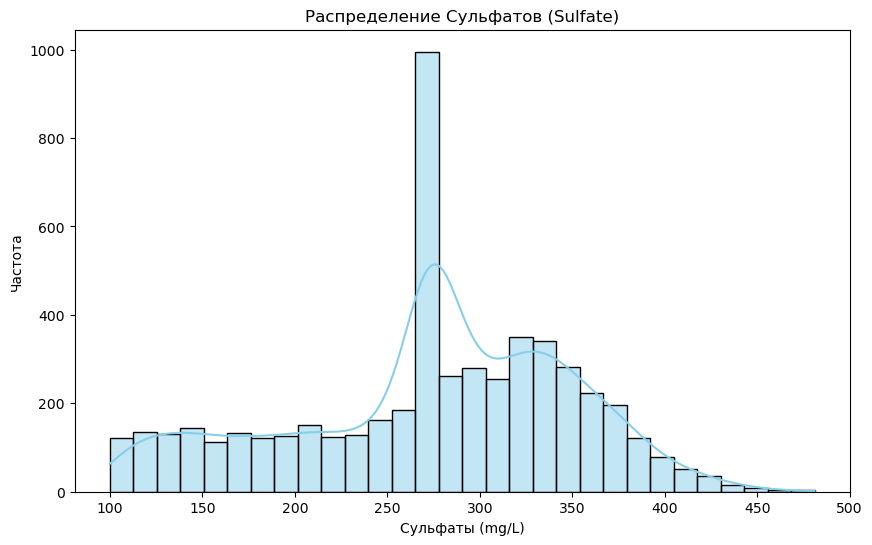

In [5190]:
#Гистограмма для Sulfate
plt.figure(figsize=(10, 6))
sns.histplot(df['Sulfate'], bins=30, kde=True, color='skyblue')
plt.title('Распределение Сульфатов (Sulfate)')
plt.xlabel('Сульфаты (mg/L)')
plt.ylabel('Частота')
plt.show()

Что показывает: 
Гистограмма показывает распределение значений сульфатов в вашем наборе данных.
Интерпретация:
Можно увидеть, как часто встречаются различные уровни сульфатов. Наличие пиков может указывать на предпочтительные уровни сульфатов в воде.

In [5192]:
#Корреляционная матрица

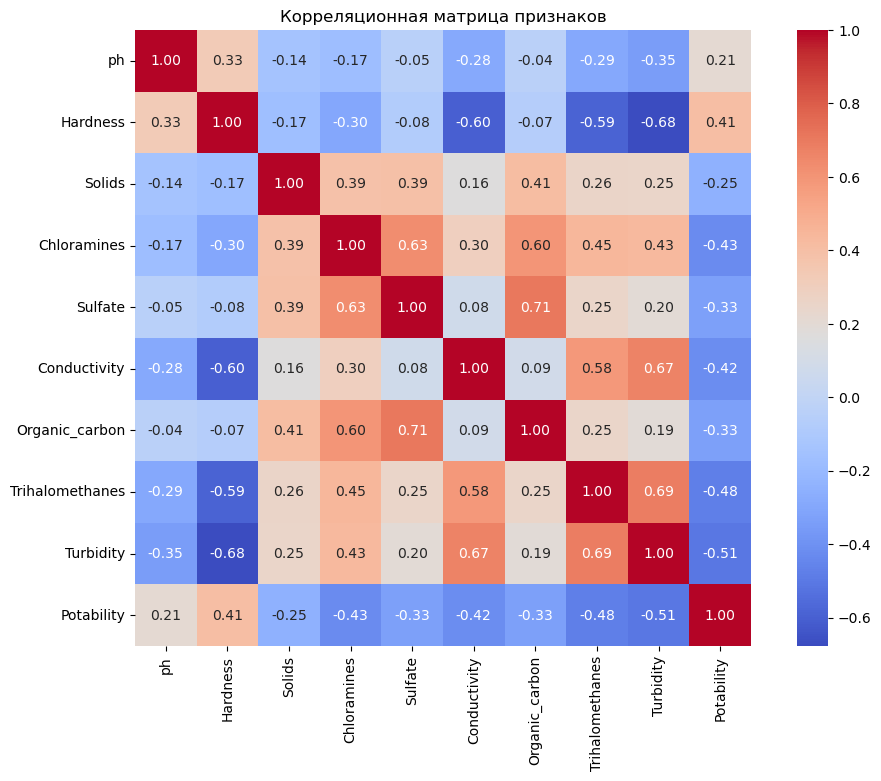

In [5193]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

Что показывает: Тепловая карта отображает корреляцию между всеми числовыми признаками в наборе данных.
Интерпретация: Значения ближе к 1 или -1 указывают на сильную корреляцию между признаками. Например, если Chloramines и
Potability имеют высокую отрицательную корреляцию, это может означать,
что более высокие уровни хлораминов связаны с меньшей вероятностью пригодности.

### Формирование дата-сета для обучения моделей

In [5196]:

# список имён признаков, которые будут использоваться для построения модели
features_names = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", 
                   "Conductivity", "Organic_carbon", "Trihalomethanes", 
                   "Turbidity"]

In [5197]:
X = df[features_names]

In [5198]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.933687,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,273.930789,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,273.930789,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
5271,7.449669,205.744900,5167.620507,0.456666,100.269136,247.186778,2.831345,48.777273,2.744804
5272,8.230292,234.940379,11543.966403,0.893505,178.744920,390.307351,4.761154,38.132652,1.438916
5273,8.327038,219.697258,14367.887221,3.918139,147.321616,268.563290,3.934885,42.331294,1.156527
5274,8.117760,233.286336,9723.791088,2.481937,110.486032,366.631775,4.295215,55.027991,2.775934


In [5199]:
y = df["Potability"]

In [5200]:
print(df[features_names].describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  5276.000000  5276.000000   5276.000000  5276.000000  5276.000000   
mean      6.933687   183.477462  19432.437487     6.139408   273.930789   
std       1.313557    54.722817   8776.372025     2.533517    76.707584   
min       0.000000    47.432000    320.942611     0.004046   100.028143   
25%       6.129847   153.442569  12698.245022     4.736116   228.593672   
50%       6.933687   190.839775  18424.491620     6.627382   273.930789   
75%       7.711626   218.514590  25308.805664     7.924135   330.003774   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   5276.000000     5276.000000      5276.000000  5276.000000  
mean     453.676789       11.446234        67.907375     4.272165  
std      128.791804        5.073521        23.406143     1.952565  
min      181.483754        2.002389         0.738000

### Обучение моделей (models fitting)

In [5202]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from imblearn.over_sampling import SMOTE

In [5203]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3534, 9) (1742, 9) (3534,) (1742,)


In [5204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [5205]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Метод k-ближайших соседей

In [5207]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [5209]:
knn_predict = knn.predict(X_test)

In [5210]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.7376578645235362

In [5211]:
confusion_matrix(knn_predict, y_test)

array([[825, 299],
       [158, 460]], dtype=int64)

print(classification_report(knn_predict, y_test))

### Метод опорных векторов

In [5214]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [5215]:
svc_predict = svc.predict(X_test)

In [5216]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.6917336394948336

In [5217]:
confusion_matrix(svc_predict, y_test)

array([[880, 434],
       [103, 325]], dtype=int64)

In [5218]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1314
           1       0.43      0.76      0.55       428

    accuracy                           0.69      1742
   macro avg       0.66      0.71      0.66      1742
weighted avg       0.78      0.69      0.71      1742



### Классификатор дерева решений

In [5220]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [5221]:
dtc_predict = dtc.predict(X_test)

In [5222]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)
dtc_accuracy

0.7382319173363949

In [5223]:
confusion_matrix(dtc_predict, y_test)

array([[749, 222],
       [234, 537]], dtype=int64)

In [5224]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       971
           1       0.71      0.70      0.70       771

    accuracy                           0.74      1742
   macro avg       0.73      0.73      0.73      1742
weighted avg       0.74      0.74      0.74      1742



### RandomForestClassifier

In [5226]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [5227]:
rfc_predict = rfc.predict(X_test)

In [5228]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.7887485648679678

In [5229]:
confusion_matrix(rfc_predict, y_test)

array([[908, 293],
       [ 75, 466]], dtype=int64)

In [5230]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1201
           1       0.61      0.86      0.72       541

    accuracy                           0.79      1742
   macro avg       0.77      0.81      0.77      1742
weighted avg       0.83      0.79      0.80      1742



### Наивный байесовский классификатор

In [5232]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [5233]:
gnb_predict = gnb.predict(X_test)

In [5234]:
gnb_accuracy = accuracy_score(gnb_predict, y_test)
gnb_accuracy

0.7411021814006888

In [5235]:
confusion_matrix(gnb_predict, y_test)

array([[831, 299],
       [152, 460]], dtype=int64)

In [5236]:
print(classification_report(gnb_predict, y_test)) 

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1130
           1       0.61      0.75      0.67       612

    accuracy                           0.74      1742
   macro avg       0.73      0.74      0.73      1742
weighted avg       0.76      0.74      0.75      1742



### Логистическая регрессия

In [5238]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5239]:
lrn_predict = lrn.predict(X_test)

In [5240]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)
lrn_accuracy

0.7187141216991964

In [5241]:
confusion_matrix(lrn_predict, y_test)

array([[806, 313],
       [177, 446]], dtype=int64)

In [5242]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1119
           1       0.59      0.72      0.65       623

    accuracy                           0.72      1742
   macro avg       0.70      0.72      0.71      1742
weighted avg       0.74      0.72      0.72      1742



### Сравнение моделей

In [5244]:
classifiers =["KNeighborsClassifier", "SVC","Gaussian Naive Bayes", "DecisionTreeClassifier", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, svc_accuracy, gnb_accuracy, dtc_accuracy, rfc_accuracy, lrn_accuracy]

In [5245]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.737658
1,SVC,0.691734
2,Gaussian Naive Bayes,0.741102
3,DecisionTreeClassifier,0.738232
4,Random Forest Classifier,0.788749
5,Logistic Regression,0.718714


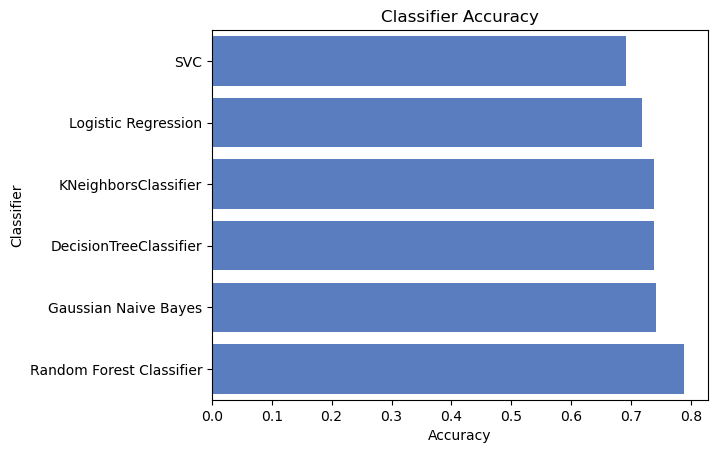

In [5246]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");